<a href="https://colab.research.google.com/github/Estherjokodola/Advertising_Sales_Prediction/blob/main/Practical_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


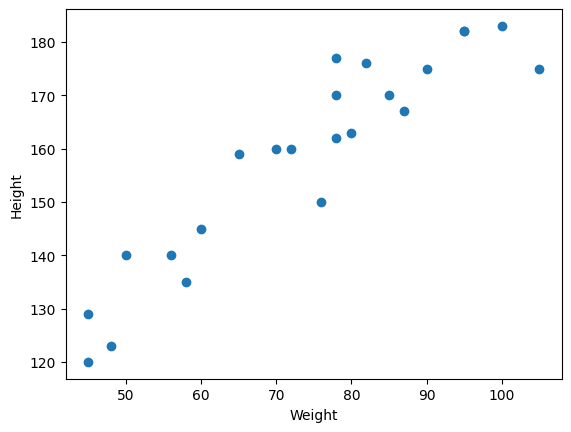

In [ ]:
# Scatter Plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [ ]:
# Correlation
df.corr()

# Pearson correlation is used and it shows the correlation between the features

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


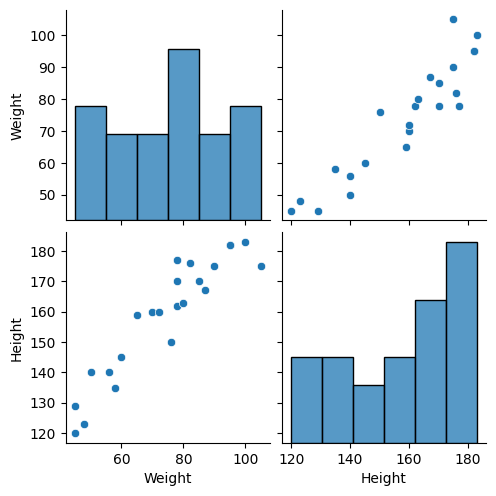

In [ ]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

# The x feature increasing positively with the y feature shows positive correlation

In [ ]:
# Independent Variable
X = df[['Weight']] # must be a two dimensional array
# X.shape
y = df[['Height']] # Can be in series form or 1D array

In [ ]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [ ]:
# Train, Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)

[[ 1.73689094]
 [-0.92026952]
 [ 1.4542143 ]
 [ 0.21043706]
 [-1.48562281]
 [ 1.17153765]
 [-1.6552288 ]
 [-0.80719886]
 [-0.24184557]
 [ 0.0973664 ]
 [-1.37255215]
 [-1.03334018]
 [-0.12877492]
 [ 0.88886101]
 [ 0.43657837]
 [ 0.60618436]
 [ 0.71925502]
 [ 0.32350772]]


In [ ]:
X_test= scaler.transform(X_test)
print(X_test)

[[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


In [ ]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
# Attribute of Linear Regression Model
print("Coefficient or slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or slope :  [[17.03440872]]
Intercept :  [157.5]


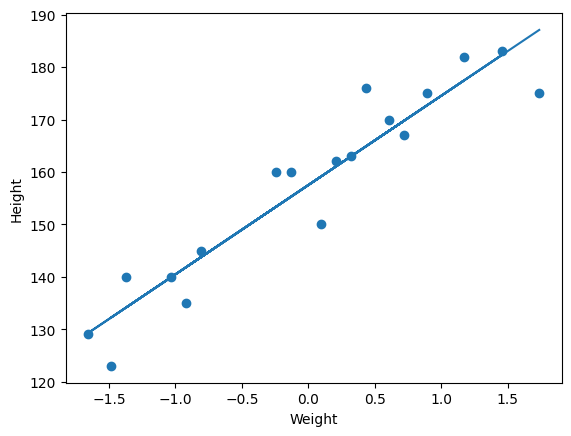

In [ ]:
# Plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.plot(X_train, regression.predict(X_train))
plt.show()

#### Prediction of test data
1. predicted height = intercept + coef_(weight)
2. y_pred_test = 156.470 + 17.29(X_test)


In [ ]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [ ]:
# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.776986986042344


In [ ]:
# Adjusted R-squared
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_score)

0.7026493147231252


In [ ]:
# OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 20 Oct 2025   Prob (F-statistic):                       0.661
Time:                        01:17:34   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[155.30639545]])